# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Özge Bülbül
## Student ID: 2220765008

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [2]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In the very beginning, I checked for the null values and after my missing data analysis, I dropped the null values.

In [5]:
housing_df.dropna(inplace=True)
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


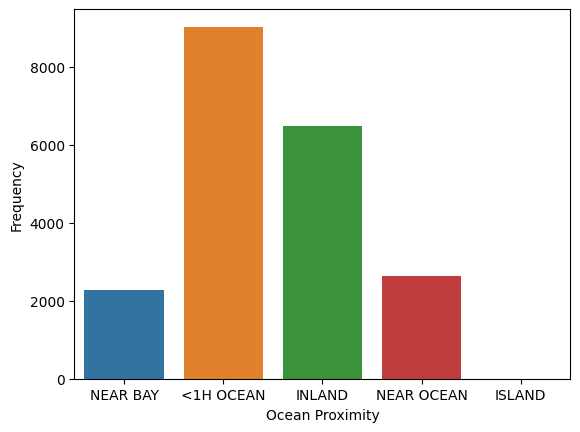

In [7]:
sns.countplot(x=housing_df['ocean_proximity'])
plt.xlabel('Ocean Proximity')
plt.ylabel('Frequency')
plt.show()

After seeing the "Island" column holds very few data, I checked if there is any data at all. Apperently there are only 5 rows with "Island" ocean proximity.

In [8]:
df = housing_df[housing_df["ocean_proximity"]=="ISLAND"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


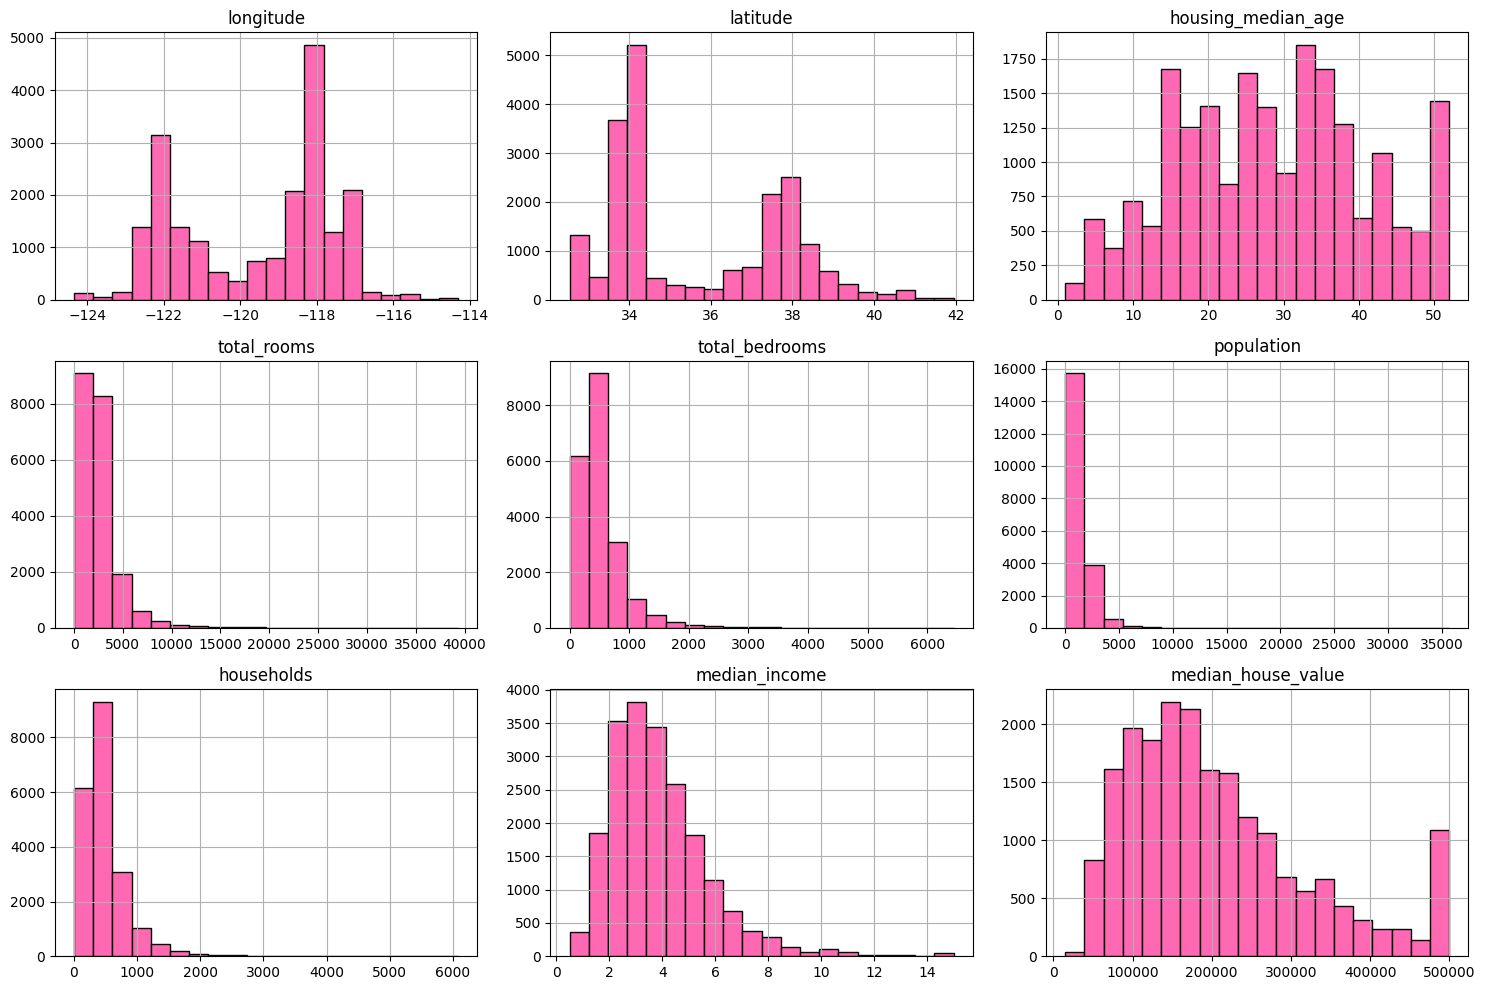

In [9]:
numerical_columns = housing_df.select_dtypes(include=['float64', 'int64']).columns
housing_df[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black', color="hotpink")
plt.tight_layout()
plt.show()

Above, I analyzed the distribution of all variables by plotting histograms for each. We can see the frequencies of each variable's values.

In the code section below, I transformed our only categorical variable, ocean proximity into numerical. I used one-hot encoding.

In [10]:
housing_df_encoded = pd.get_dummies(housing_df, columns=['ocean_proximity'])
housing_df_encoded = housing_df_encoded.astype(int)
housing_df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121,39,25,1665,374,845,330,1,78100,0,1,0,0,0
20636,-121,39,18,697,150,356,114,2,77100,0,1,0,0,0
20637,-121,39,17,2254,485,1007,433,1,92300,0,1,0,0,0
20638,-121,39,18,1860,409,741,349,1,84700,0,1,0,0,0


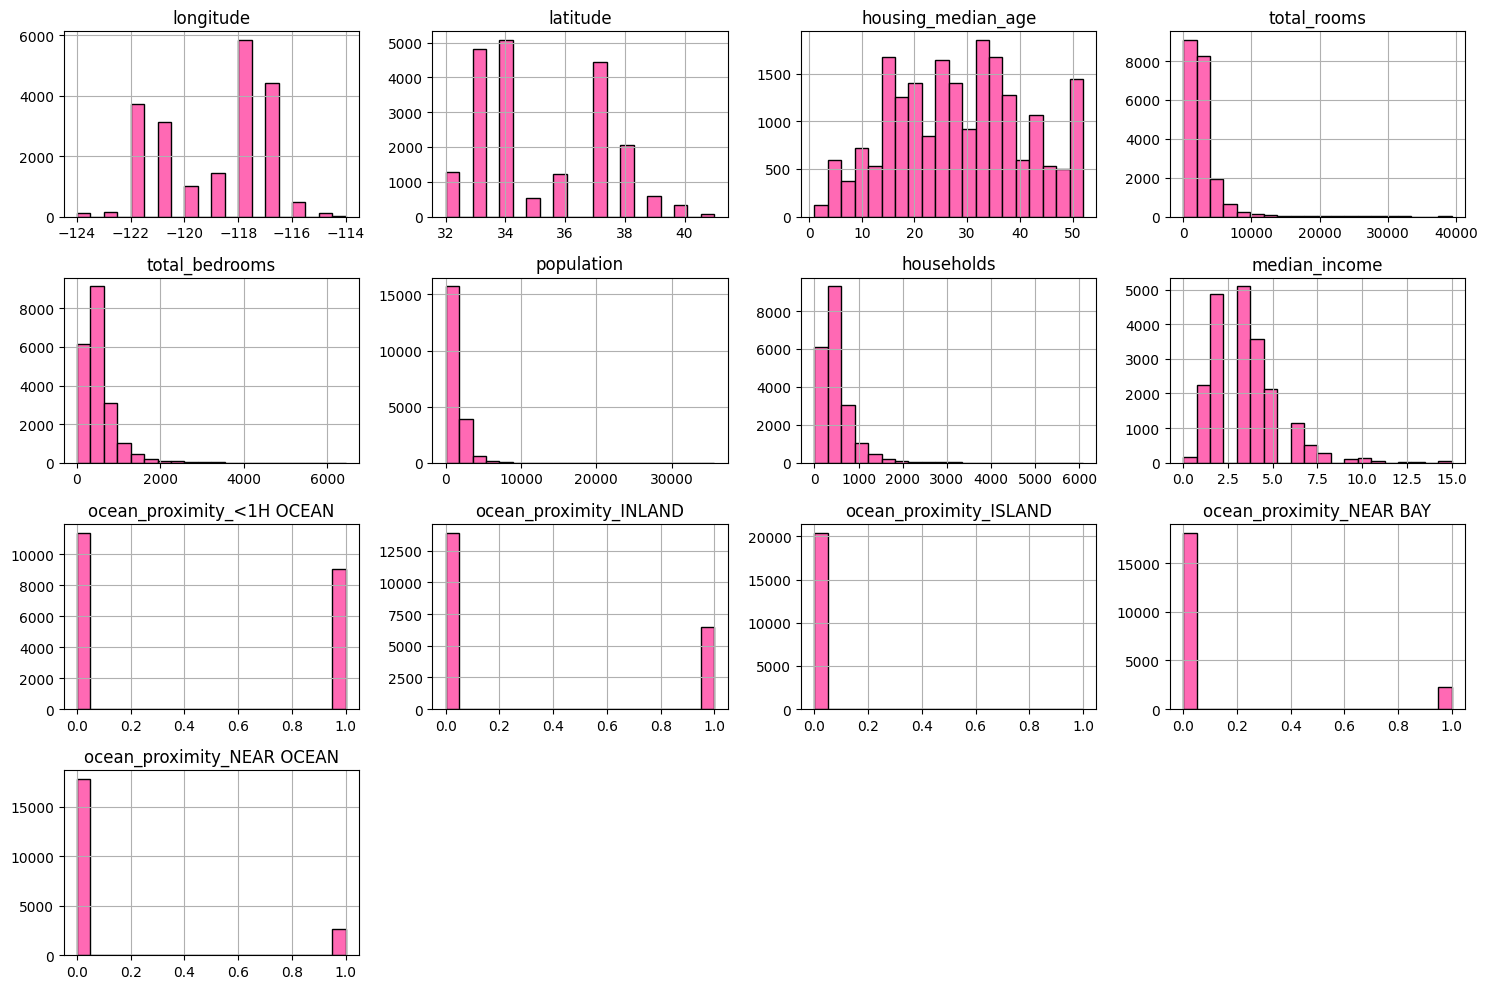

In [11]:
numerical_columns = housing_df_encoded.select_dtypes(include=['float', 'int']).columns
numerical_columns = numerical_columns.drop('median_house_value')
housing_df_encoded[numerical_columns].hist(bins=20, color="hotpink", figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

In this section, I plotted histograms for all values (except median house value) to see their relationship with median house value, our target variable.

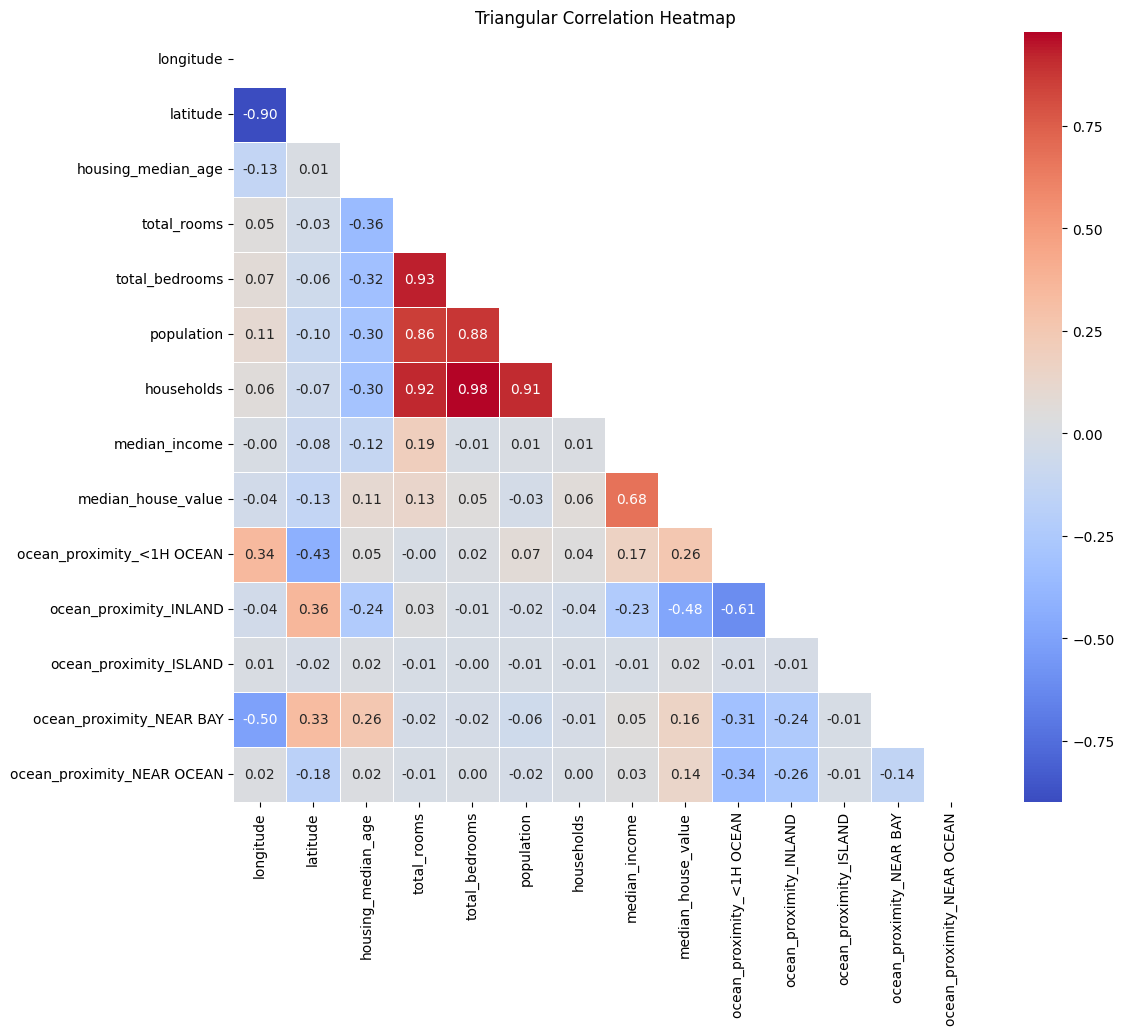

In [12]:
correlation_matrix = housing_df_encoded.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Triangular Correlation Heatmap')
plt.show()

In the heatmap above, we can see that total rooms-total bedrooms, total bedrooms-households, total rooms-households and population-households have strong positive correlations. Whereas latitude and longitude have the strongest negative correlation.
<br><br>
These variables have no correlation (correlation being 0 or .01):<br><br>
. Ocean proximity(<1H ocean) -  total rooms<br>
. Ocean proximity(island) - total bedrooms<br>
. Ocean proximity(near ocean) - households<br>
. Ocean proximity(island) - longitude<br>
. Housing median age - latitude<br>
. Ocean proximity(island) - total rooms<br>
. Ocean proximity(near ocean) - total rooms<br>
. Median income - total bedrooms<br>
. Ocean proximity(inland) - total bedrooms<br>
. Median income - population<br>
. Ocean proximity(island) - population<br>
. Median income - households<br>
. Ocean proximity(island) - households<br>
. Ocean proximity(near bay) - households<br>
. Ocean proximity(island) - median income<br>
. Ocean proximity(island) - Ocean proximity(<1H ocean)<br>
. Ocean proximity(island) - Ocean proximity(inland)<br>
. Ocean proximity(near bay) - Ocean proximity(island)<br>
. Ocean proximity(near ocean) - Ocean proximity(island)<br><br>

Variables with mild hues are correlated weakly, warmer tones indicate positive correlations whereas cooler tones indicate negative ones.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

I used boxplots to visualize the data first. Outliers, if any, are plotted as points above and below the plot. I did this to visualize the outliers of each variable.

In [13]:
outlier_detection_df = housing_df.copy()

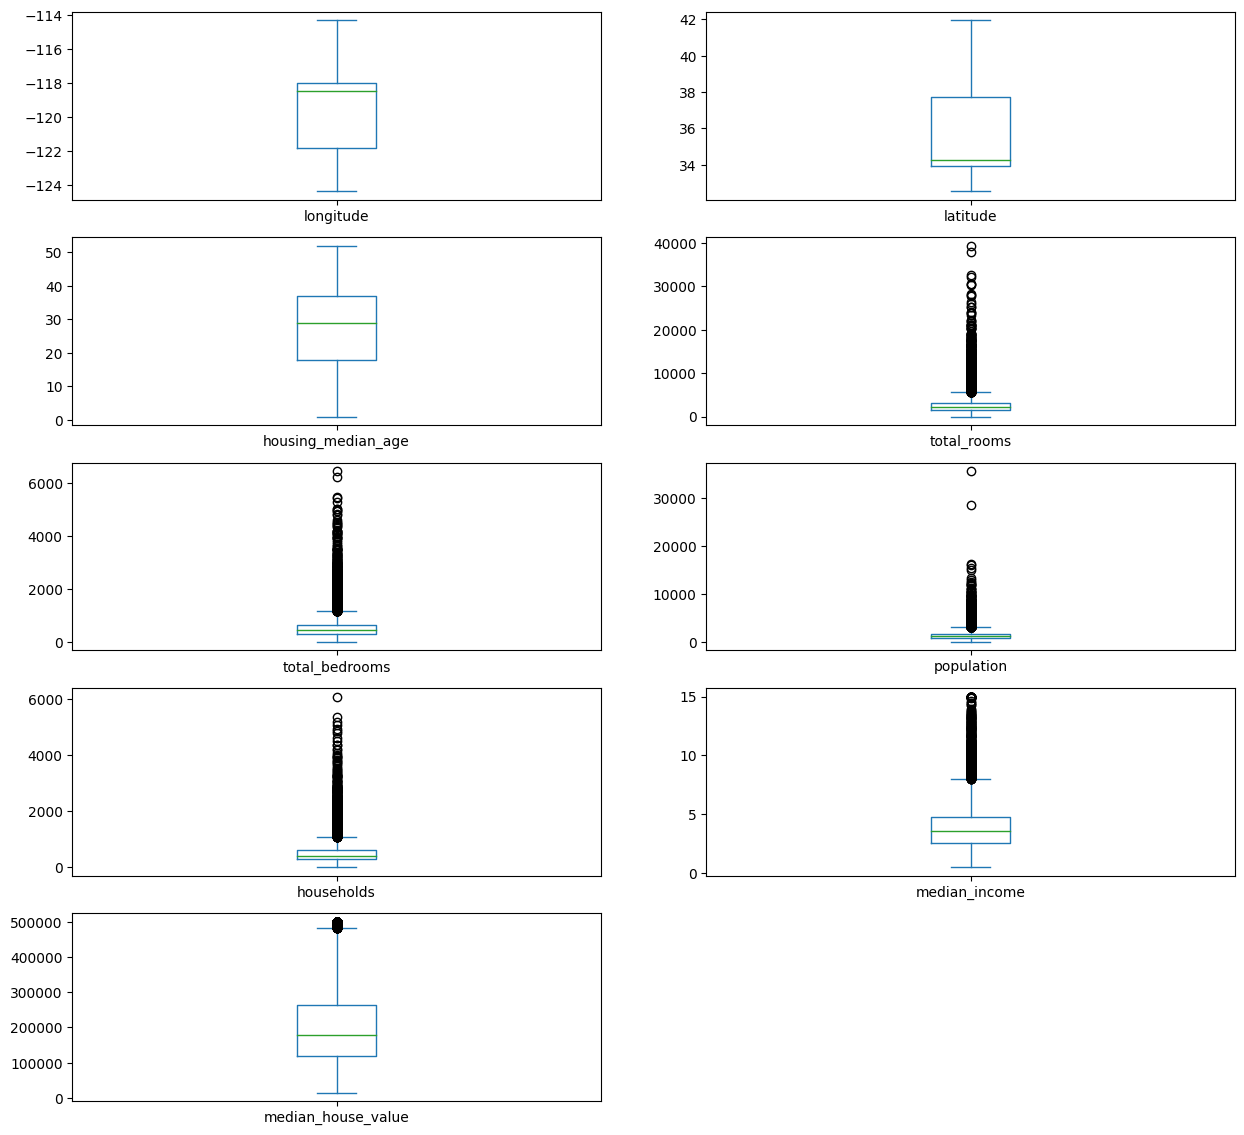

In [14]:
outlier_detection_df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))
plt.show()

For detecting outliers, I decided to use the IQR method. This method uses interquartile range which is beneficial because it is not sensitive to outliers. The IQR method makes use of spread of the middle 50% of the data, making it less susceptible to extreme values that might otherwise distort the analysis. By relying on the interquartile range, we encapsulate the central tendency of the data and this method offers a reliable means of locating deviations from the norm. I defined a function to calculate upper and lower bounds using IQR and returned the outliers of the given dataset. After individually detecting outliers of each column, I also displayed the outliers.

In [15]:
outlier_detection_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
outlier_detection_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
def detect_outliers(df, column):
    data = df[column]
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data < lower_bound) | (data > upper_bound)
    return df[outliers]

In [18]:
longitude_outliers_df = detect_outliers(outlier_detection_df, "longitude")
longitude_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [19]:
latitude_outliers_df = detect_outliers(outlier_detection_df, "latitude")
latitude_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [20]:
housing_median_age_outliers_df = detect_outliers(outlier_detection_df, "housing_median_age")
housing_median_age_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [21]:
total_rooms_outliers_df = detect_outliers(outlier_detection_df, "total_rooms")
total_rooms_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY
104,-122.26,37.81,34.0,5871.0,1914.0,2689.0,1789.0,2.8406,335700.0,NEAR BAY
185,-122.23,37.79,43.0,5963.0,1344.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20567,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0,INLAND


In [22]:
total_bedrooms_outliers_df = detect_outliers(outlier_detection_df, "total_bedrooms")
total_bedrooms_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20539,-121.71,38.56,20.0,8627.0,1516.0,4071.0,1466.0,4.2198,164100.0,INLAND
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND


In [23]:
population_outliers_df = detect_outliers(outlier_detection_df, "population")
population_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
185,-122.23,37.79,43.0,5963.0,1344.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
460,-122.26,37.87,52.0,1087.0,371.0,3337.0,350.0,1.4012,175000.0,NEAR BAY
485,-122.26,37.86,35.0,5161.0,1744.0,3276.0,1742.0,1.6307,253600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20604,-121.54,39.12,17.0,4251.0,899.0,3265.0,934.0,2.3496,65000.0,INLAND


In [24]:
households_outliers_df = detect_outliers(outlier_detection_df, "households")
households_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20541,-121.70,38.54,13.0,6819.0,1158.0,2828.0,1115.0,4.6225,226500.0,INLAND
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND


In [25]:
median_income_outliers_df = detect_outliers(outlier_detection_df, "median_income")
median_income_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,NEAR BAY
134,-122.19,37.83,28.0,1326.0,184.0,463.0,190.0,8.2049,335200.0,NEAR BAY
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20428,-118.83,34.23,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [26]:
category_counts = outlier_detection_df['ocean_proximity'].value_counts()
category_counts

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Above, we can see that island value is quite low compared to others. Since ocean proximity is a categorical variable, I wouldn't take island values as outliers, because house being on an island doesn't seem like an anomaly, it is a rare but valid value. However, in part 1.3, it is said that we shall use mode imputation for categorical variables. Therefore, I will treat island value as the outlier.

In [27]:
ocean_proximity_outliers_df = outlier_detection_df[outlier_detection_df['ocean_proximity'] == 'ISLAND']
ocean_proximity_outliers_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [28]:
outlier_removed_df = housing_df.copy()
outlier_removed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [29]:
outlier_removed_df.loc[outlier_removed_df['median_income'].isin(median_income_outliers_df['median_income']), 'median_income'] = None
outlier_removed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,NaN,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,NaN,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [30]:
outlier_removed_df.loc[outlier_removed_df['households'].isin(households_outliers_df['households']), 'households'] = None
outlier_removed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,NaN,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,NaN,NaN,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
outlier_removed_df.loc[outlier_removed_df['population'].isin(population_outliers_df['population']), 'population'] = None
outlier_removed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,NaN,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,NaN,NaN,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [32]:
outlier_removed_df.loc[outlier_removed_df['total_bedrooms'].isin(total_bedrooms_outliers_df['total_bedrooms']), 'total_bedrooms'] = None
outlier_removed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,NaN,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,NaN,NaN,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [33]:
outlier_removed_df.loc[outlier_removed_df['total_rooms'].isin(total_rooms_outliers_df['total_rooms']), 'total_rooms'] = None
outlier_removed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,NaN,452600.0,NEAR BAY
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,NaN,NaN,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [34]:
outlier_removed_df.loc[outlier_removed_df['ocean_proximity'].isin(ocean_proximity_outliers_df['ocean_proximity']), 'ocean_proximity'] = None
outlier_removed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,NaN,452600.0,NEAR BAY
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,NaN,NaN,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Above, I removed the outliers that were previously detected.

In [35]:
outlier_removed_df.isna().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value       0
ocean_proximity          5
dtype: int64

I removed the null values for the outlier removed dataset.

In [36]:
outlier_row_removal_df = outlier_removed_df.copy()
outlier_row_removal_df.dropna(inplace=True)
outlier_row_removal_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
outlier_row_removal_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Here, I imputated nulls with mean values for each column for the mean imputated dataset. (I did mode imputation for the categorical variable.)

In [38]:
mean_imputated_df = outlier_removed_df.copy()
numeric_columns = mean_imputated_df.select_dtypes(include='number').columns
mean_imputated_df[numeric_columns] = mean_imputated_df[numeric_columns].apply(lambda col: col.fillna(col.mean()))
mean_imputated_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000000,129.0,322.0,126.000000,3.658839,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2221.992791,1106.0,2401.0,429.637101,3.658839,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.000000,190.0,496.0,177.000000,7.257400,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.000000,235.0,558.0,219.000000,5.643100,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.000000,280.0,565.0,259.000000,3.846200,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.000000,374.0,845.0,330.000000,1.560300,78100.0,INLAND
20636,-121.21,39.49,18.0,697.000000,150.0,356.0,114.000000,2.556800,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.000000,485.0,1007.0,433.000000,1.700000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.000000,409.0,741.0,349.000000,1.867200,84700.0,INLAND


In [39]:
mean_imputated_df['ocean_proximity'].fillna(mean_imputated_df['ocean_proximity'].mode().iloc[0], inplace=True)
mean_imputated_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000000,129.0,322.0,126.000000,3.658839,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2221.992791,1106.0,2401.0,429.637101,3.658839,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.000000,190.0,496.0,177.000000,7.257400,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.000000,235.0,558.0,219.000000,5.643100,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.000000,280.0,565.0,259.000000,3.846200,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.000000,374.0,845.0,330.000000,1.560300,78100.0,INLAND
20636,-121.21,39.49,18.0,697.000000,150.0,356.0,114.000000,2.556800,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.000000,485.0,1007.0,433.000000,1.700000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.000000,409.0,741.0,349.000000,1.867200,84700.0,INLAND


In [40]:
mean_imputated_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Here, I imputated nulls with median values for each column for the median imputated dataset. (I did mode imputation for the categorical variable.)

In [41]:
median_imputated_df = outlier_removed_df.copy()
numeric_columns = median_imputated_df.select_dtypes(include='number').columns
median_imputated_df[numeric_columns] = median_imputated_df[numeric_columns].apply(lambda col: col.fillna(col.median()))
median_imputated_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.4722,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2036.0,1106.0,2401.0,392.0,3.4722,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [42]:
median_imputated_df['ocean_proximity'].fillna(median_imputated_df['ocean_proximity'].mode().iloc[0], inplace=True)
median_imputated_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.4722,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2036.0,1106.0,2401.0,392.0,3.4722,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [43]:
median_imputated_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [44]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [45]:
outlier_row_removal_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17989.000000,17989.000000,17989.000000,17989.000000,17989.000000,17989.000000,17989.000000,17989.000000,17989.000000
mean,-119.606477,35.681038,29.702096,2150.348213,445.743955,1188.297460,416.817889,3.633406,196713.456724
std,2.003426,2.158304,12.281138,1088.246775,221.534736,599.351727,205.478828,1.486149,106964.173805
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,19.000000,1382.000000,287.000000,761.000000,271.000000,2.515600,114700.000000
50%,-118.560000,34.280000,30.000000,1987.000000,412.000000,1102.000000,387.000000,3.443200,174000.000000
75%,-118.030000,37.740000,38.000000,2790.000000,578.000000,1545.000000,540.000000,4.564400,251100.000000
max,-114.490000,41.950000,52.000000,5675.000000,1173.000000,3124.000000,1090.000000,8.014400,500001.000000


In [46]:
mean_imputated_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2221.992791,458.033713,1225.285662,429.637101,3.658839,206864.413155
std,2.003578,2.136348,12.591805,1112.039529,229.250419,621.125212,214.288640,1.464965,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,2814.000000,579.000000,1557.000000,543.000000,4.548600,264700.000000
max,-114.310000,41.950000,52.000000,5679.000000,1173.000000,3124.000000,1090.000000,8.014400,500001.000000


In [47]:
median_imputated_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2210.250477,455.419077,1219.212157,427.408310,3.652719,206864.413155
std,2.003578,2.136348,12.591805,1112.959172,229.475111,621.605221,214.472709,1.465342,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2036.000000,416.000000,1121.000000,392.000000,3.472200,179700.000000
75%,-118.010000,37.720000,37.000000,2814.000000,579.000000,1557.000000,543.000000,4.548600,264700.000000
max,-114.310000,41.950000,52.000000,5679.000000,1173.000000,3124.000000,1090.000000,8.014400,500001.000000


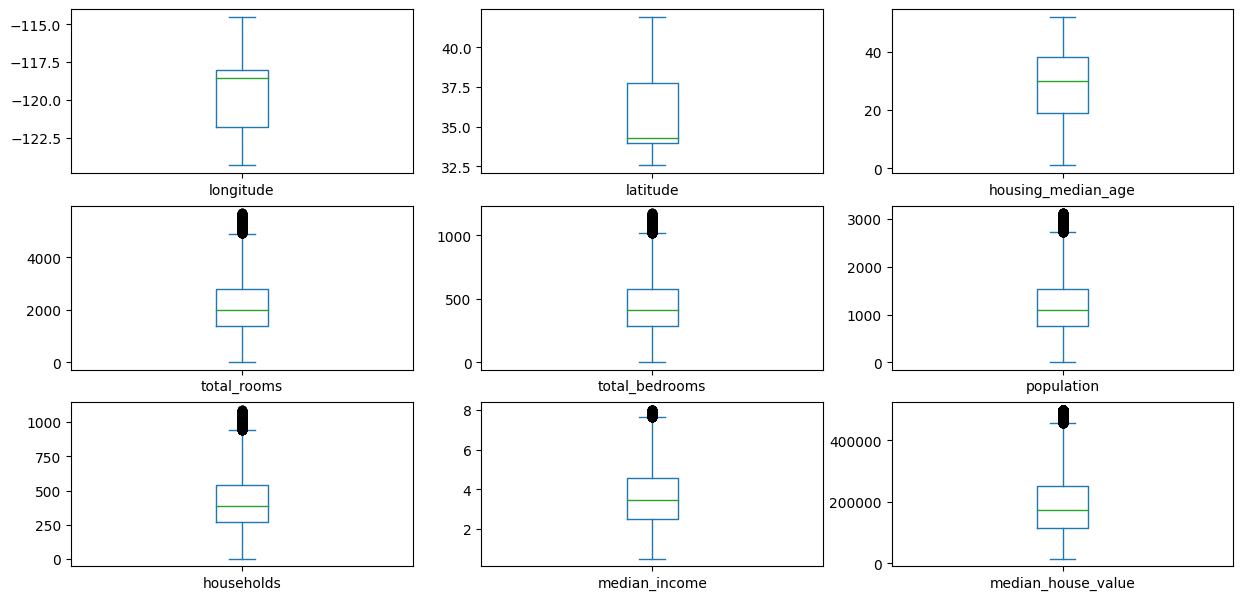

In [48]:
outlier_row_removal_df.plot(kind="box",subplots=True,layout=(8,3),figsize=(15,20))
plt.show()

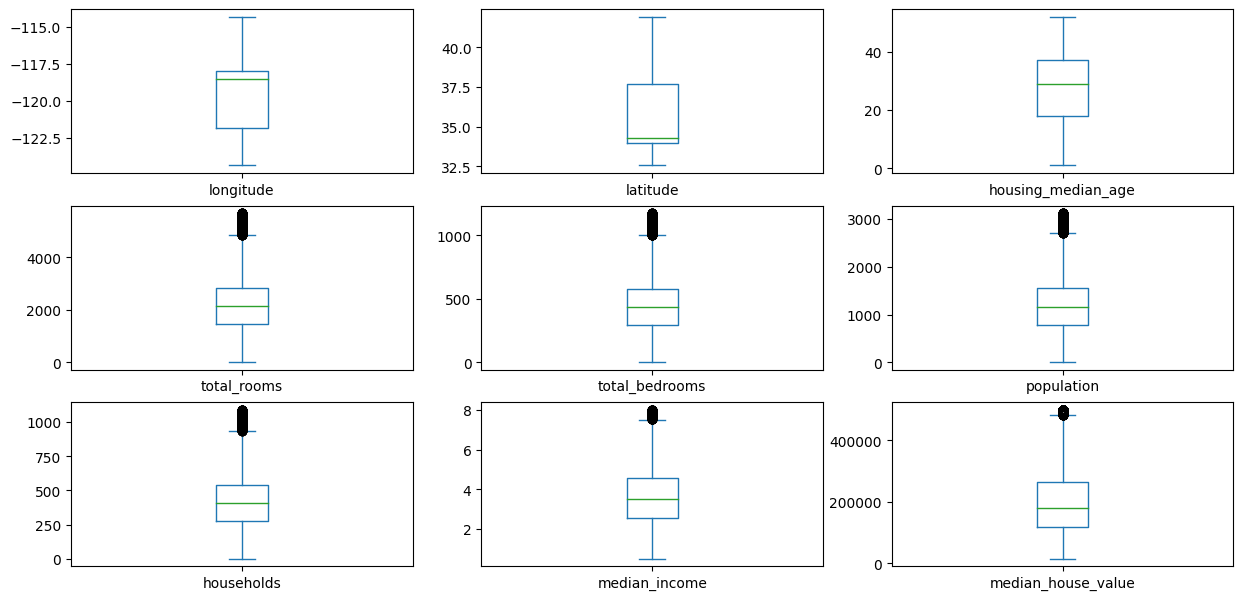

In [49]:
mean_imputated_df.plot(kind="box",subplots=True,layout=(8,3),figsize=(15,20))
plt.show()

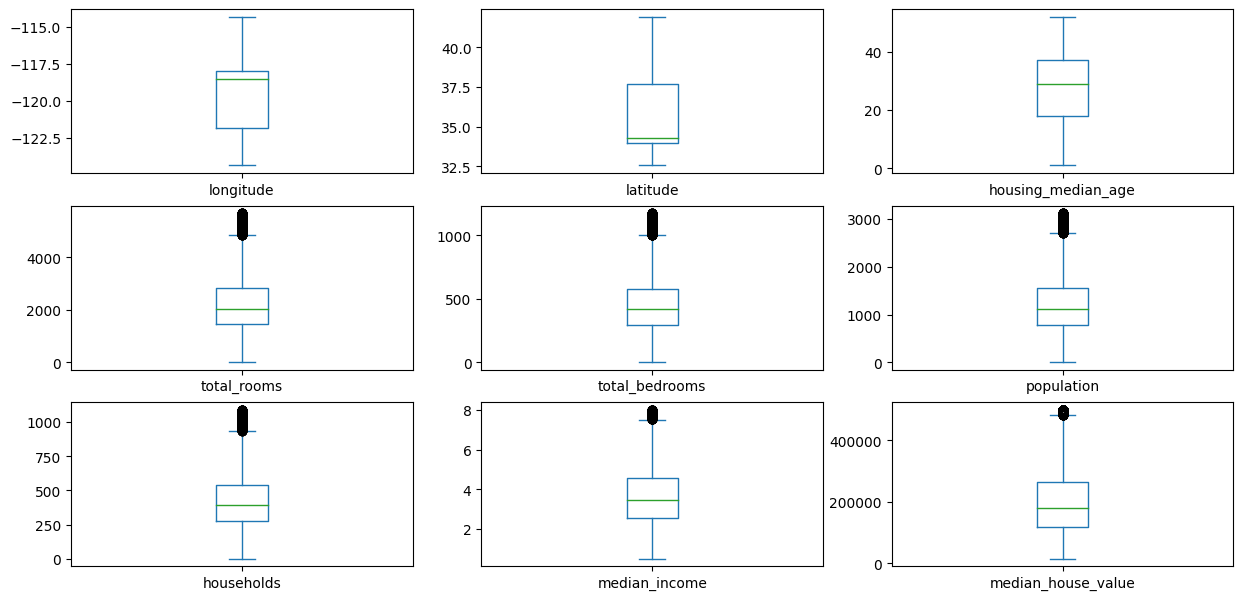

In [50]:
median_imputated_df.plot(kind="box",subplots=True,layout=(8,3),figsize=(15,20))
plt.show()

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

The ordinal variable is 'ocean proximity'. I took 'NEAR OCEAN', 'NEAR BAY', '<1H OCEAN', 'INLAND' respectively and numbered them 1 through 4.

I defined an encoder for our only ordi al variable, ocean proximity. Then, encoded all datasets.

In [51]:
def oceanProximity_encoder(df):
    proximity_mapping = {'NEAR OCEAN': 1, 'NEAR BAY': 2, '<1H OCEAN': 3, 'INLAND':4}
    df['ocean_proximity'] = df['ocean_proximity'].map(proximity_mapping)
    return df

outlier_row_removal_df = oceanProximity_encoder(outlier_row_removal_df)
mean_imputated_df = oceanProximity_encoder(mean_imputated_df)
median_imputated_df = oceanProximity_encoder(median_imputated_df)

In [52]:
housing_copy_df = housing_df.copy()
proximity_mapping = {'ISLAND': 0, 'NEAR OCEAN': 1, 'NEAR BAY': 2, '<1H OCEAN': 3, 'INLAND':4}
housing_copy_df['ocean_proximity'] = housing_copy_df['ocean_proximity'].map(proximity_mapping)

In [53]:
housing_copy_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,4
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,4
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,4
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,4


In [54]:
outlier_row_removal_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,2
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,4
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,4
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,4
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,4


In [55]:
mean_imputated_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000000,129.0,322.0,126.000000,3.658839,452600.0,2
1,-122.22,37.86,21.0,2221.992791,1106.0,2401.0,429.637101,3.658839,358500.0,2
2,-122.24,37.85,52.0,1467.000000,190.0,496.0,177.000000,7.257400,352100.0,2
3,-122.25,37.85,52.0,1274.000000,235.0,558.0,219.000000,5.643100,341300.0,2
4,-122.25,37.85,52.0,1627.000000,280.0,565.0,259.000000,3.846200,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.000000,374.0,845.0,330.000000,1.560300,78100.0,4
20636,-121.21,39.49,18.0,697.000000,150.0,356.0,114.000000,2.556800,77100.0,4
20637,-121.22,39.43,17.0,2254.000000,485.0,1007.0,433.000000,1.700000,92300.0,4
20638,-121.32,39.43,18.0,1860.000000,409.0,741.0,349.000000,1.867200,84700.0,4


In [56]:
median_imputated_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.4722,452600.0,2
1,-122.22,37.86,21.0,2036.0,1106.0,2401.0,392.0,3.4722,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,4
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,4
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,4
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,4


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In the split function that I defined, firstly the data is randomized. This is necessary because data can be ordered (our data is most visibly ordered in ocean proximity). Then, I split the data 70-30. Since median house value is our target variable, I put all other variables in x train and x test. Median house value is put into y train and y test. Finally, my function returns these train-test datasets.

In [57]:
def dataset_splitter(df):
    np.random.seed(4)
    num_rows = len(df)
    shuffled_indices = np.random.permutation(num_rows)
    num_train = int(0.7 * num_rows)
    train_indices = shuffled_indices[:num_train]
    test_indices = shuffled_indices[num_train:]
    train_set = df.iloc[train_indices]
    X_train = train_set.drop('median_house_value', axis=1)
    y_train = train_set['median_house_value']
    test_set = df.iloc[test_indices]
    X_test = test_set.drop('median_house_value', axis=1)
    y_test = test_set['median_house_value']
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = dataset_splitter(housing_copy_df)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13167,-121.37,36.83,14.0,3658.0,612.0,1951.0,600.0,4.7600,4
17566,-121.91,37.32,42.0,1067.0,256.0,608.0,280.0,3.0096,3
19593,-120.87,37.60,32.0,4579.0,914.0,2742.0,856.0,2.6619,4
13825,-117.15,34.48,31.0,265.0,55.0,186.0,55.0,2.1250,4
19554,-120.99,37.62,37.0,2014.0,505.0,1787.0,515.0,1.5515,4
...,...,...,...,...,...,...,...,...,...
20184,-119.16,34.28,11.0,5330.0,1056.0,2801.0,1028.0,4.7630,1
13018,-121.20,38.69,26.0,3077.0,607.0,1603.0,595.0,2.7174,4
1529,-122.07,37.89,38.0,757.0,124.0,319.0,123.0,5.6558,2
10045,-121.00,39.23,15.0,2809.0,450.0,1267.0,408.0,4.0426,4


In [58]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14819,-117.11,32.67,43.0,515.0,146.0,445.0,140.0,1.6094,1
660,-122.15,37.70,36.0,1464.0,244.0,672.0,261.0,3.5547,2
4695,-118.37,34.07,44.0,2703.0,663.0,1045.0,619.0,3.2010,3
11429,-117.97,33.67,25.0,3906.0,660.0,1809.0,622.0,5.6765,3
20302,-119.21,34.12,15.0,5778.0,1285.0,1722.0,829.0,4.3427,1
...,...,...,...,...,...,...,...,...,...
17003,-122.29,37.55,27.0,3789.0,874.0,2243.0,866.0,4.3900,1
11980,-117.49,33.98,17.0,2727.0,462.0,1691.0,448.0,4.8371,4
17259,-119.72,34.42,31.0,1524.0,383.0,1257.0,398.0,2.6019,1
8455,-118.35,33.91,32.0,1660.0,366.0,928.0,398.0,4.3187,3


# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

In [59]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = dataset_splitter(housing_copy_df)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13167,-121.37,36.83,14.0,3658.0,612.0,1951.0,600.0,4.7600,4
17566,-121.91,37.32,42.0,1067.0,256.0,608.0,280.0,3.0096,3
19593,-120.87,37.60,32.0,4579.0,914.0,2742.0,856.0,2.6619,4
13825,-117.15,34.48,31.0,265.0,55.0,186.0,55.0,2.1250,4
19554,-120.99,37.62,37.0,2014.0,505.0,1787.0,515.0,1.5515,4
...,...,...,...,...,...,...,...,...,...
20184,-119.16,34.28,11.0,5330.0,1056.0,2801.0,1028.0,4.7630,1
13018,-121.20,38.69,26.0,3077.0,607.0,1603.0,595.0,2.7174,4
1529,-122.07,37.89,38.0,757.0,124.0,319.0,123.0,5.6558,2
10045,-121.00,39.23,15.0,2809.0,450.0,1267.0,408.0,4.0426,4


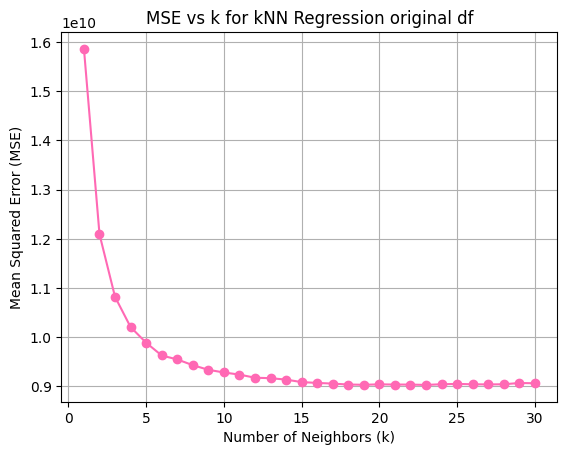

In [60]:
k_values = np.arange(1, 31)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o', color='hotpink')
plt.title('MSE vs k for kNN Regression original df')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [61]:
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for original df: {optimal_k}")

Optimal k for original df: 23


In [62]:
index_of_k = np.where(k_values == optimal_k)[0][0]
mse_for_k_23 = mse_values[index_of_k]
print(f"MSE for k = {optimal_k}: {mse_for_k_23}")

MSE for k = 23: 9031180393.444164


In [63]:
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
predictedY = knn_model.predict(X_test)

r_squared = r2_score(y_test, predictedY)
print(f"R-squared for the optimal k for original df: {r_squared}")

R-squared for the optimal k for original df: 0.30639561871467214


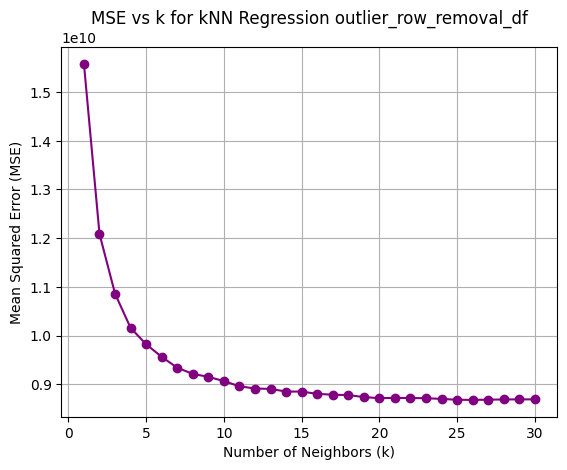

In [64]:
X_train, X_test, y_train, y_test = dataset_splitter(outlier_row_removal_df)

k_values = np.arange(1, 31)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o', color='purple')
plt.title('MSE vs k for kNN Regression outlier_row_removal_df')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [65]:
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for outlier_row_removal_df: {optimal_k}")

Optimal k for outlier_row_removal_df: 26


In [66]:
optimal_k=optimal_k+1   #because k is even above, I incremented it
index_of_k = np.where(k_values == optimal_k)[0][0]
mse_for_k_26 = mse_values[index_of_k]
print(f"MSE for k = {optimal_k}: {mse_for_k_26}")

MSE for k = 27: 8683591347.57472


In [67]:
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
predictedY = knn_model.predict(X_test)
r_squared = r2_score(y_test, predictedY)
print(f"R-squared for the optimal k for outlier_row_removal_df: {r_squared}")

R-squared for the optimal k for outlier_row_removal_df: 0.24392884572995033


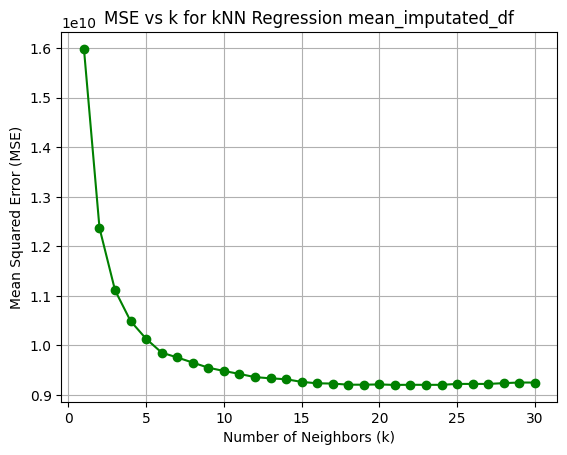

In [68]:
X_train, X_test, y_train, y_test = dataset_splitter(mean_imputated_df)

k_values = np.arange(1, 31)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o', color='green')
plt.title('MSE vs k for kNN Regression mean_imputated_df')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [69]:
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for mean_imputated_df: {optimal_k}")

Optimal k for mean_imputated_df: 21


In [70]:
index_of_k = np.where(k_values == optimal_k)[0][0]
mse_for_k_21 = mse_values[index_of_k]
print(f"MSE for k = {optimal_k}: {mse_for_k_21}")

MSE for k = 21: 9201657408.74656


In [71]:
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
predictedY = knn_model.predict(X_test)
r_squared = r2_score(y_test, predictedY)
print(f"R-squared for the optimal k for mean_imputated_df: {r_squared}")

R-squared for the optimal k for mean_imputated_df: 0.2933028003264999


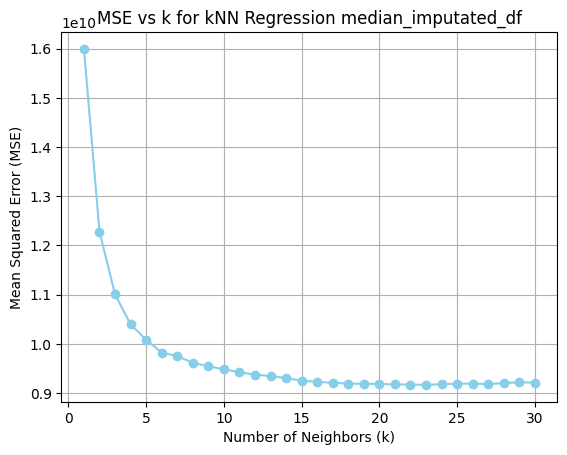

In [72]:
X_train, X_test, y_train, y_test = dataset_splitter(median_imputated_df)

k_values = np.arange(1, 31)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o', color='skyblue')
plt.title('MSE vs k for kNN Regression median_imputated_df')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [73]:
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for median_imputated_df: {optimal_k}")

Optimal k for median_imputated_df: 23


In [74]:
index_of_k = np.where(k_values == optimal_k)[0][0]
mse_for_k_21_median = mse_values[index_of_k]
print(f"MSE for k = {optimal_k}: {mse_for_k_21_median}")

MSE for k = 23: 9166156987.079187


In [75]:
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
predictedY = knn_model.predict(X_test)
r_squared = r2_score(y_test, predictedY)
print(f"R-squared for the optimal k for median_imputated_df: {r_squared}")

R-squared for the optimal k for median_imputated_df: 0.2960292709464245


Optimal k values are 23, 27, 21, 23 respectively. For the optimal k's, MSE values are as follows: original df: 9031180393.444164, outlier row removed df: 8683591347.57472, mean imputated df: 9201657408.74656, median imputated df: 9166156987.079187. MSE is the average of the squared differences between predicted and actual values. Lower mse indicates the model's predictions are closer to the actual values. Therefore outlier row removed df has the best model among others.

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

In [76]:
from sklearn.linear_model import LinearRegression
X_train_orig, X_test_orig, y_train_orig, y_test_orig = dataset_splitter(housing_copy_df)
reg_orig = LinearRegression()
reg_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = reg_orig.predict(X_test_orig)
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
print(f'MSE for original dataset: {mse_orig}')

MSE for original dataset: 4727964176.030877


In [77]:
X_train_removed, X_test_removed, y_train_removed, y_test_removed = dataset_splitter(outlier_row_removal_df)
reg_removed = LinearRegression()
reg_removed.fit(X_train_removed, y_train_removed)
y_pred_removed = reg_removed.predict(X_test_removed)
mse_removed = mean_squared_error(y_test_removed, y_pred_removed)
print(f'MSE for outlier removal dataset: {mse_removed}')

MSE for outlier removal dataset: 4375600291.853656


In [78]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = dataset_splitter(mean_imputated_df)
reg_mean = LinearRegression()
reg_mean.fit(X_train_mean, y_train_mean)
y_pred_mean = reg_mean.predict(X_test_mean)
mse_mean = mean_squared_error(y_test_mean, y_pred_mean)
print(f'MSE for mean imputation dataset: {mse_mean}')

MSE for mean imputation dataset: 6460538779.484261


In [79]:
X_train_median, X_test_median, y_train_median, y_test_median = dataset_splitter(median_imputated_df)
reg_median = LinearRegression()
reg_median.fit(X_train_median, y_train_median)
y_pred_median = reg_median.predict(X_test_median)
mse_median = mean_squared_error(y_test_median, y_pred_median)
print(f'MSE for median imputation dataset: {mse_median}')

MSE for median imputation dataset: 6583795071.464317


Linear regression models' MSE values are calculated above. Outlier removed dataset model has the lowest mse whereas, mean and median imputated ones have the highest. Looking at the mse values, we can say that the outlier removed dataset model is the best.

## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

In both regressions, outlier removed df model was better. Therefore, we can say that removing the outliers was beneficial. Mean or median imputation, on the other hand were not a good practise because of the high mse values.
<br><br>
Linear regression is a simpler model but it assumes that the dataset target and features are linearly related. If this relationship is complex, linear regression won't be able to capture it well. Knn is more flexible because it doesn't assume dataset is linear, it can deal with complex/non-linear data. 
<br><br>
As I stated above, knn may be better if dataset is complex although our dataset has a linear distribution. For instance, as total rooms or ocean proximity increases, house's value also increases. Our knn and linear regression models support this as well. MSE values of linear regression models are lower than knn, therefore linear regression captures our dataset better.
<br><br>
However, since MSE is a scale-dependent value and taking square makes it quite sensitive to any outliers, by only observing MSE values the decision we make wouldn't be precise. 

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices